In [1]:
import pandahouse
import hashlib
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def ab_split(id, salt='exp_mess_1', n_groups=5):
    test_id = str(id) + '-' + str(salt)
    test_id_digest = hashlib.md5(test_id.encode('ascii')).hexdigest()
    test_id_final_int = int(test_id_digest, 16)
    return test_id_final_int % n_groups

In [2]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator'
}

q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM simulator_20240620.feed_actions  
WHERE toDate(time) between '2024-05-24' and '2024-05-30'
    and exp_group in (2,3)
GROUP BY exp_group, user_id
"""

df = pandahouse.read_clickhouse(q, connection=connection)

In [5]:
p_values = []
for i in range(10000):
    subsample_2 = np.random.choice(df[df.exp_group == 2].ctr, size=500, replace=False)
    subsample_3 = np.random.choice(df[df.exp_group == 3].ctr, size=500, replace=False)
    p_values.append(stats.ttest_ind(subsample_2, subsample_3, equal_var=False).pvalue)

1. Построить гистограмму распределения получившихся 10000 p-values.

(array([322., 309., 349., 330., 326., 313., 341., 318., 339., 343., 308.,
        297., 355., 334., 353., 298., 362., 352., 334., 366., 355., 317.,
        321., 334., 350., 351., 319., 338., 348., 318.]),
 array([5.60354649e-07, 3.33308120e-02, 6.66610637e-02, 9.99913154e-02,
        1.33321567e-01, 1.66651819e-01, 1.99982070e-01, 2.33312322e-01,
        2.66642574e-01, 2.99972825e-01, 3.33303077e-01, 3.66633329e-01,
        3.99963580e-01, 4.33293832e-01, 4.66624084e-01, 4.99954336e-01,
        5.33284587e-01, 5.66614839e-01, 5.99945091e-01, 6.33275342e-01,
        6.66605594e-01, 6.99935846e-01, 7.33266097e-01, 7.66596349e-01,
        7.99926601e-01, 8.33256852e-01, 8.66587104e-01, 8.99917356e-01,
        9.33247607e-01, 9.66577859e-01, 9.99908111e-01]),
 <BarContainer object of 30 artists>)

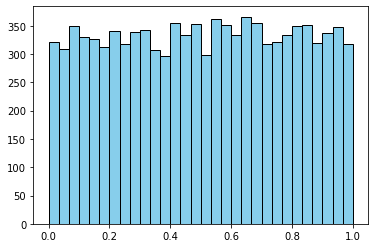

In [6]:
plt.hist(p_values, bins=30, color='skyblue', edgecolor='black')

2. Посчитать, какой процент p values оказался меньше либо равен 0.05

In [8]:
print(f'{len([i for i in p_values if i <= 0.05]) / len(p_values) * 100}%')

4.7%


3. Написать вывод по проведенному А/А-тесту, корректно ли работает наша система сплитования. При выполнении задания важно обосновать и аргументировать ваш вывод.

Вывод по А/А тесту: меньше 4.7% процента наших значений оказались меньше значения 0.05, а также исходя из графика можно заметить что распределения p значения находятся на одном уровне. Наше система сплитования работает корректно 